In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


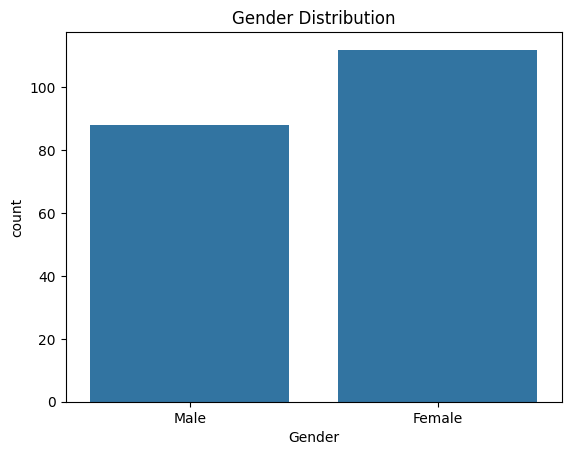

In [5]:
import seaborn as sns  
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

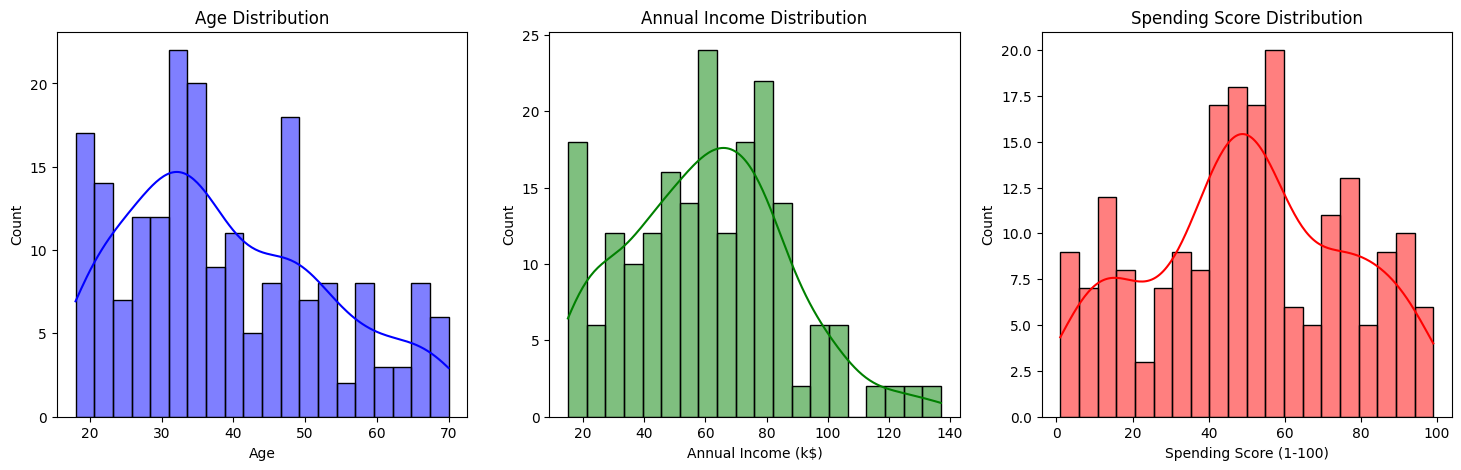

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0], color='blue').set_title('Age Distribution')
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, ax=axes[1], color='green').set_title('Annual Income Distribution')
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, ax=axes[2], color='red').set_title('Spending Score Distribution')
plt.show()

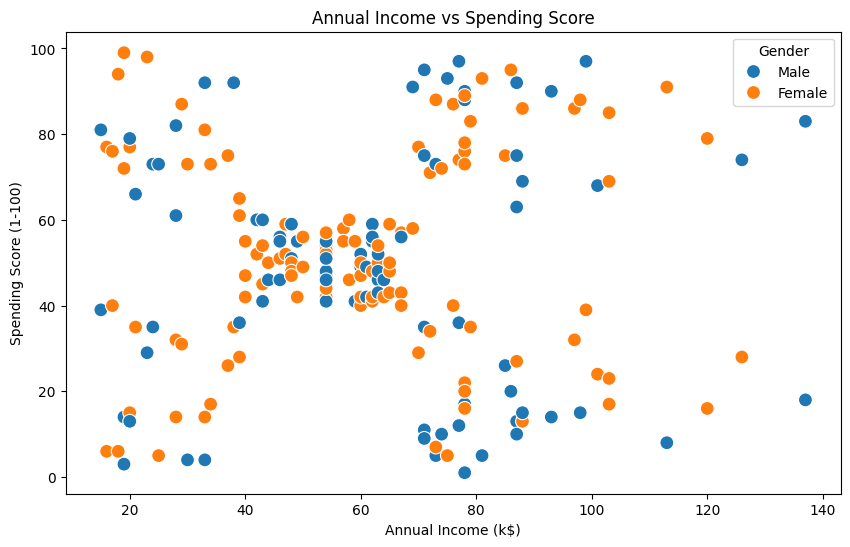

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender', s=100)
plt.title('Annual Income vs Spending Score')
plt.show()

select numerical features

In [12]:
df_numerical = df[['Age',	'Annual Income (k$)'	,'Spending Score (1-100)']]
df_numerical

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [13]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(df_numerical)
df_scaled_numerical_data = pd.DataFrame(scaled_numerical_data, columns= df_numerical.columns)
scaled_numerical_data

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [20]:
df_scaled_numerical_data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


apply pca for visulization

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_numerical_data)
df_scaled_numerical_data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df_scaled_numerical_data_pca.head()

,PC1,PC2
0,-0.615720,-1.763481
1,-1.665793,-1.820747
2,0.337862,-1.674799
3,-1.456573,-1.772430
4,-0.038465,-1.662740


i used gender to have a colorful classification on gender

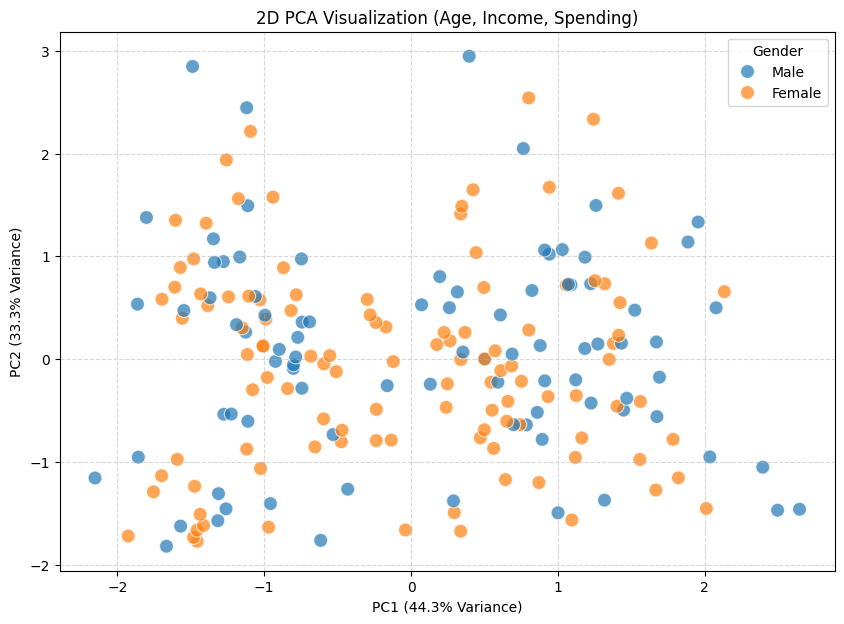

In [23]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue=df['Gender'], data=df_scaled_numerical_data_pca, s=100, alpha=0.7)
plt.title('2D PCA Visualization (Age, Income, Spending)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% Variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% Variance)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [24]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=['Age',	'Annual Income (k$)'	,'Spending Score (1-100)'])
print(loadings)

                             PC1       PC2
Age                     0.706382  0.030141
Annual Income (k$)     -0.048024  0.998832
Spending Score (1-100) -0.706199 -0.037775


What exactly did PCA do here?
Think of your data as a 3D cloud formed by three features: Age, Annual Income, and Spending Score. PCA acted as a "camera" rotating in this 3D space to find the specific angle where the customers are most spread out and their differences are most visible.

Principal Component 1 (PC1): Captures approximately 44.3% of the total information (variance).

Principal Component 2 (PC2): Captures about 33.3% of the variance.

Total: Together, this 2D plot represents 77.6% of all the numerical behavior of your customers, which is an excellent representation for a simplified visualization.

By looking at the Loadings (the weights each feature contributes to the axis), we can define what these new "mathematical" axes actually represent:PC1 Analysis (Horizontal Axis):This axis shows a strong correlation with Age ($+0.70$) and Spending Score ($-0.70$).Interpretation: PC1 represents the contrast between "Youthful Spending" and "Senior Frugality." * Points to the left (negative PC1 values) likely represent younger customers with high spending scores.Points to the right (positive PC1 values) represent older customers who spend less.PC2 Analysis (Vertical Axis):This axis is almost entirely defined ($+0.99$) by Annual Income.Interpretation: PC2 is essentially your "Wealth Axis." The higher a point is on the graph, the higher the customer's annual income.

Graph Insights
Customer Distribution: You can see that the data isn't just a random cloud. There is a higher density of points in the lower section of the graph (representing average to low-income earners).

Gender Differences: Based on the color coding, the distribution of men and women in this 2D space is very similar. This suggests there isn't a deep structural difference in buying behavior between genders based on these three specific parameters.

Clustering Potential: This visualization clearly shows that your data has the potential to be divided into 5 or 6 distinct groups (Clusters), as the points tend to gather in specific regions rather than being evenly distributed.

## Kmeans

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in  k_range:
    kmeans = KMeans(n_clusters=k, random_state= 3, n_init= 10)
    labels = kmeans.fit_predict(scaled_numerical_data)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_numerical_data, labels))

In [26]:
results_df = pd.DataFrame({
    'k': list(k_range),
    'Inertia': inertias,
    'Silhouette Score': silhouette_scores
})
print(results_df)

    k     Inertia  Silhouette Score
0   2  389.386189          0.335472
1   3  295.212246          0.357793
2   4  205.225147          0.403958
3   5  168.247580          0.416643
4   6  133.868334          0.427428
5   7  117.011555          0.417232
6   8  104.097841          0.410983
7   9   92.014875          0.420644
8  10   82.628014          0.399569


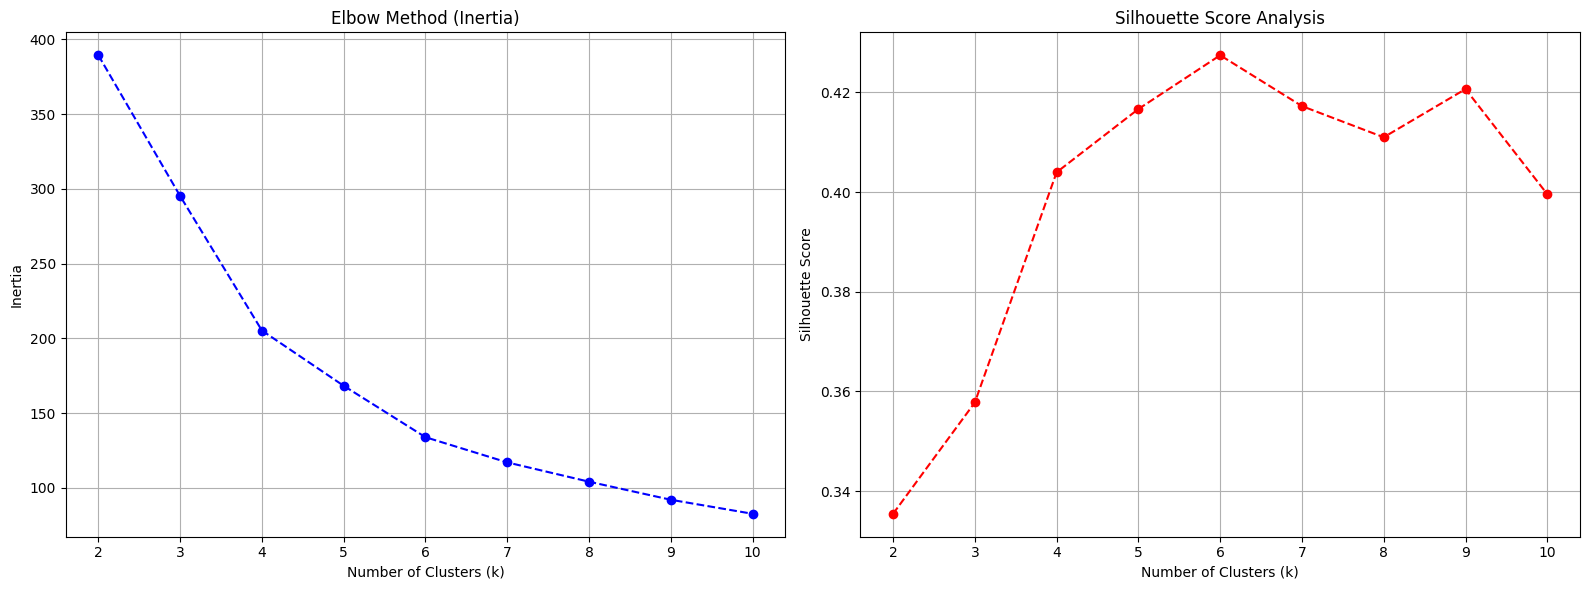

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(k_range, inertias, marker='o', linestyle='--', color='b')
ax1.set_title('Elbow Method (Inertia)')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.grid(True)

ax2.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='r')
ax2.set_title('Silhouette Score Analysis')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.grid(True)

plt.tight_layout()
plt.show()

By combining both methods, $k=6$ is selected as the optimal number of clusters because:

Peak Silhouette Score: It provides the highest value (0.428), indicating excellent cluster density and separation.

Elbow Consistency: After $k=6$, the reduction in error (Inertia) becomes much flatter, suggesting that adding more clusters provides diminishing returns and would likely overfit the data.

## AgglomerativeClustering

In [35]:
from sklearn.cluster import AgglomerativeClustering
k = 6
linkages = ['single', 'ward', 'average', 'complete']
results = []

for link in linkages:
    model = AgglomerativeClustering(n_clusters = k, linkage = link)
    labels = model.fit_predict(scaled_numerical_data)
    score = silhouette_score(scaled_numerical_data, labels)
    
    results.append({'Linkage': link, 'Silhouette Score': score})
    print(f"Linkage: {link:10} | Silhouette Score: {score:.5f}")
    

Linkage: single     | Silhouette Score: -0.04275
Linkage: ward       | Silhouette Score: 0.42012
Linkage: average    | Silhouette Score: 0.38957
Linkage: complete   | Silhouette Score: 0.37456


In [38]:
results_df = pd.DataFrame(results)
best_linkage = results_df.loc[results_df['Silhouette Score'].idxmax()]


In [39]:
print(f"Best Linkage: {best_linkage['Linkage']}")
print(f"Score: {best_linkage['Silhouette Score']:.5f}")

Best Linkage: ward
Score: 0.42012


visualize and analyse each linkage

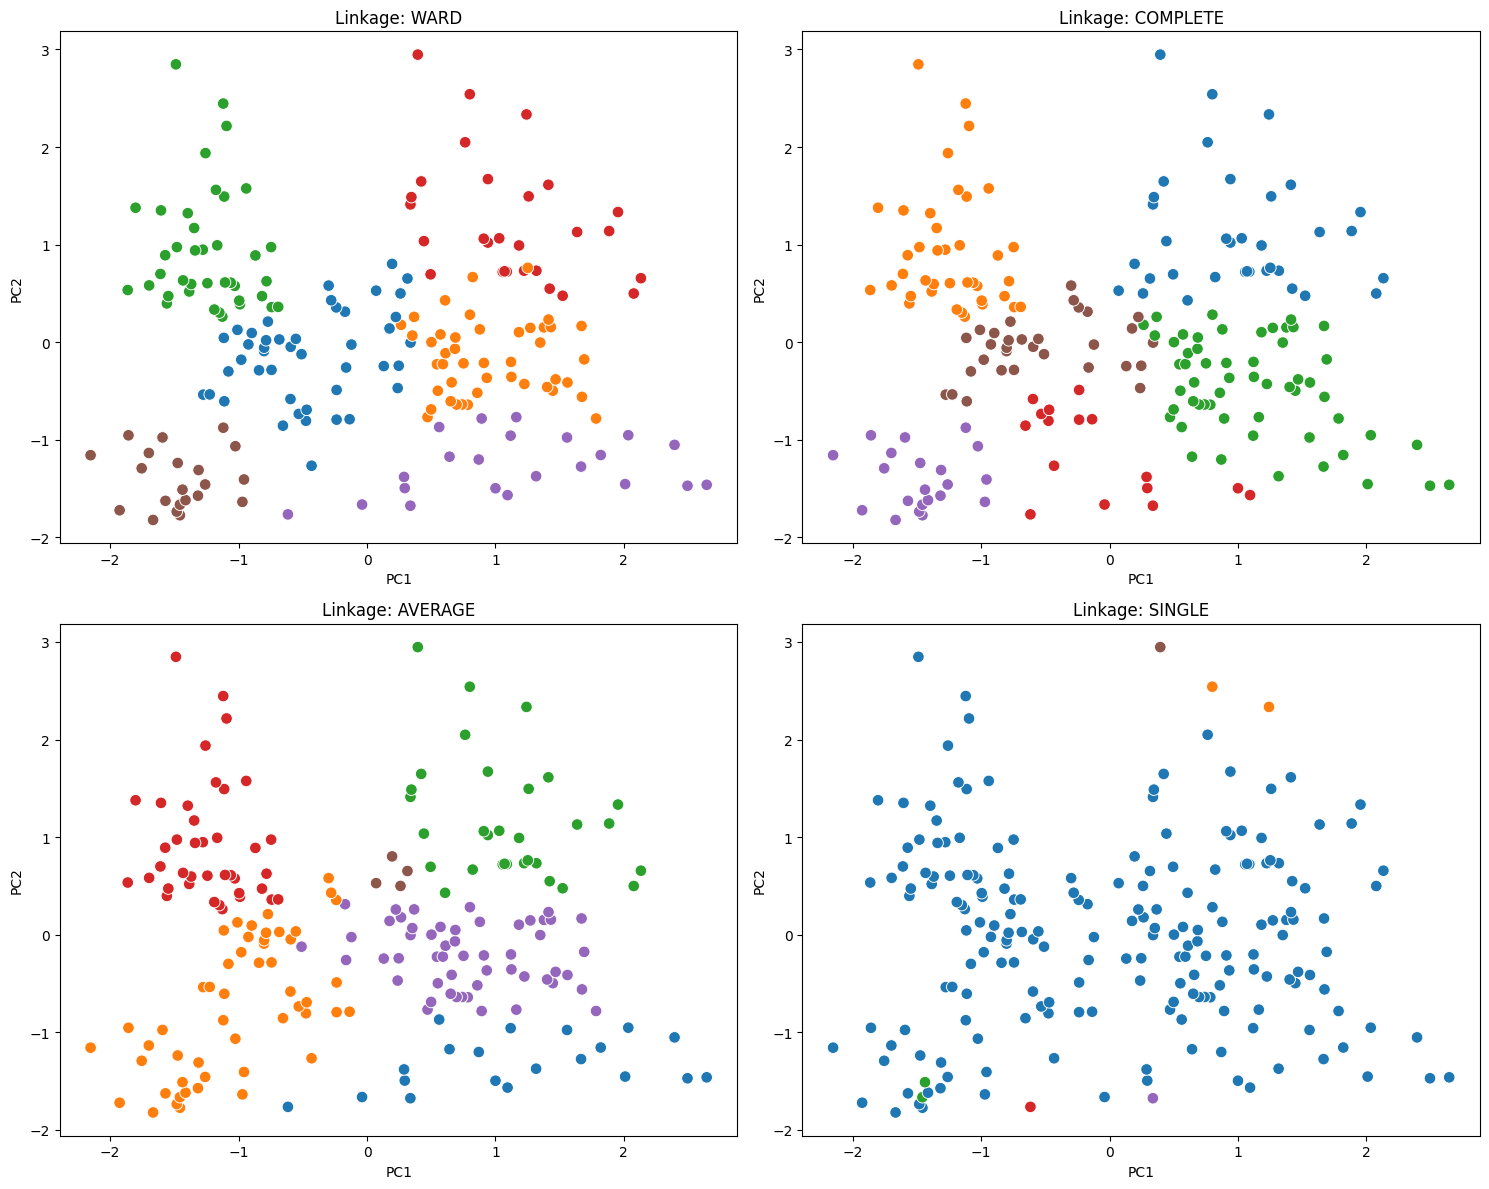

In [40]:
linkages = ['ward', 'complete', 'average', 'single']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()
for i, l in enumerate(linkages):
    model = AgglomerativeClustering(n_clusters=6, linkage=l)
    labels = model.fit_predict(scaled_numerical_data)
    
    sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=labels, 
                    palette='tab10', ax=axes[i], s=70, legend=None)
    axes[i].set_title(f'Linkage: {l.upper()}')
    axes[i].set_xlabel('PC1')
    axes[i].set_ylabel('PC2')

plt.tight_layout()
plt.show()

plot dendogram 


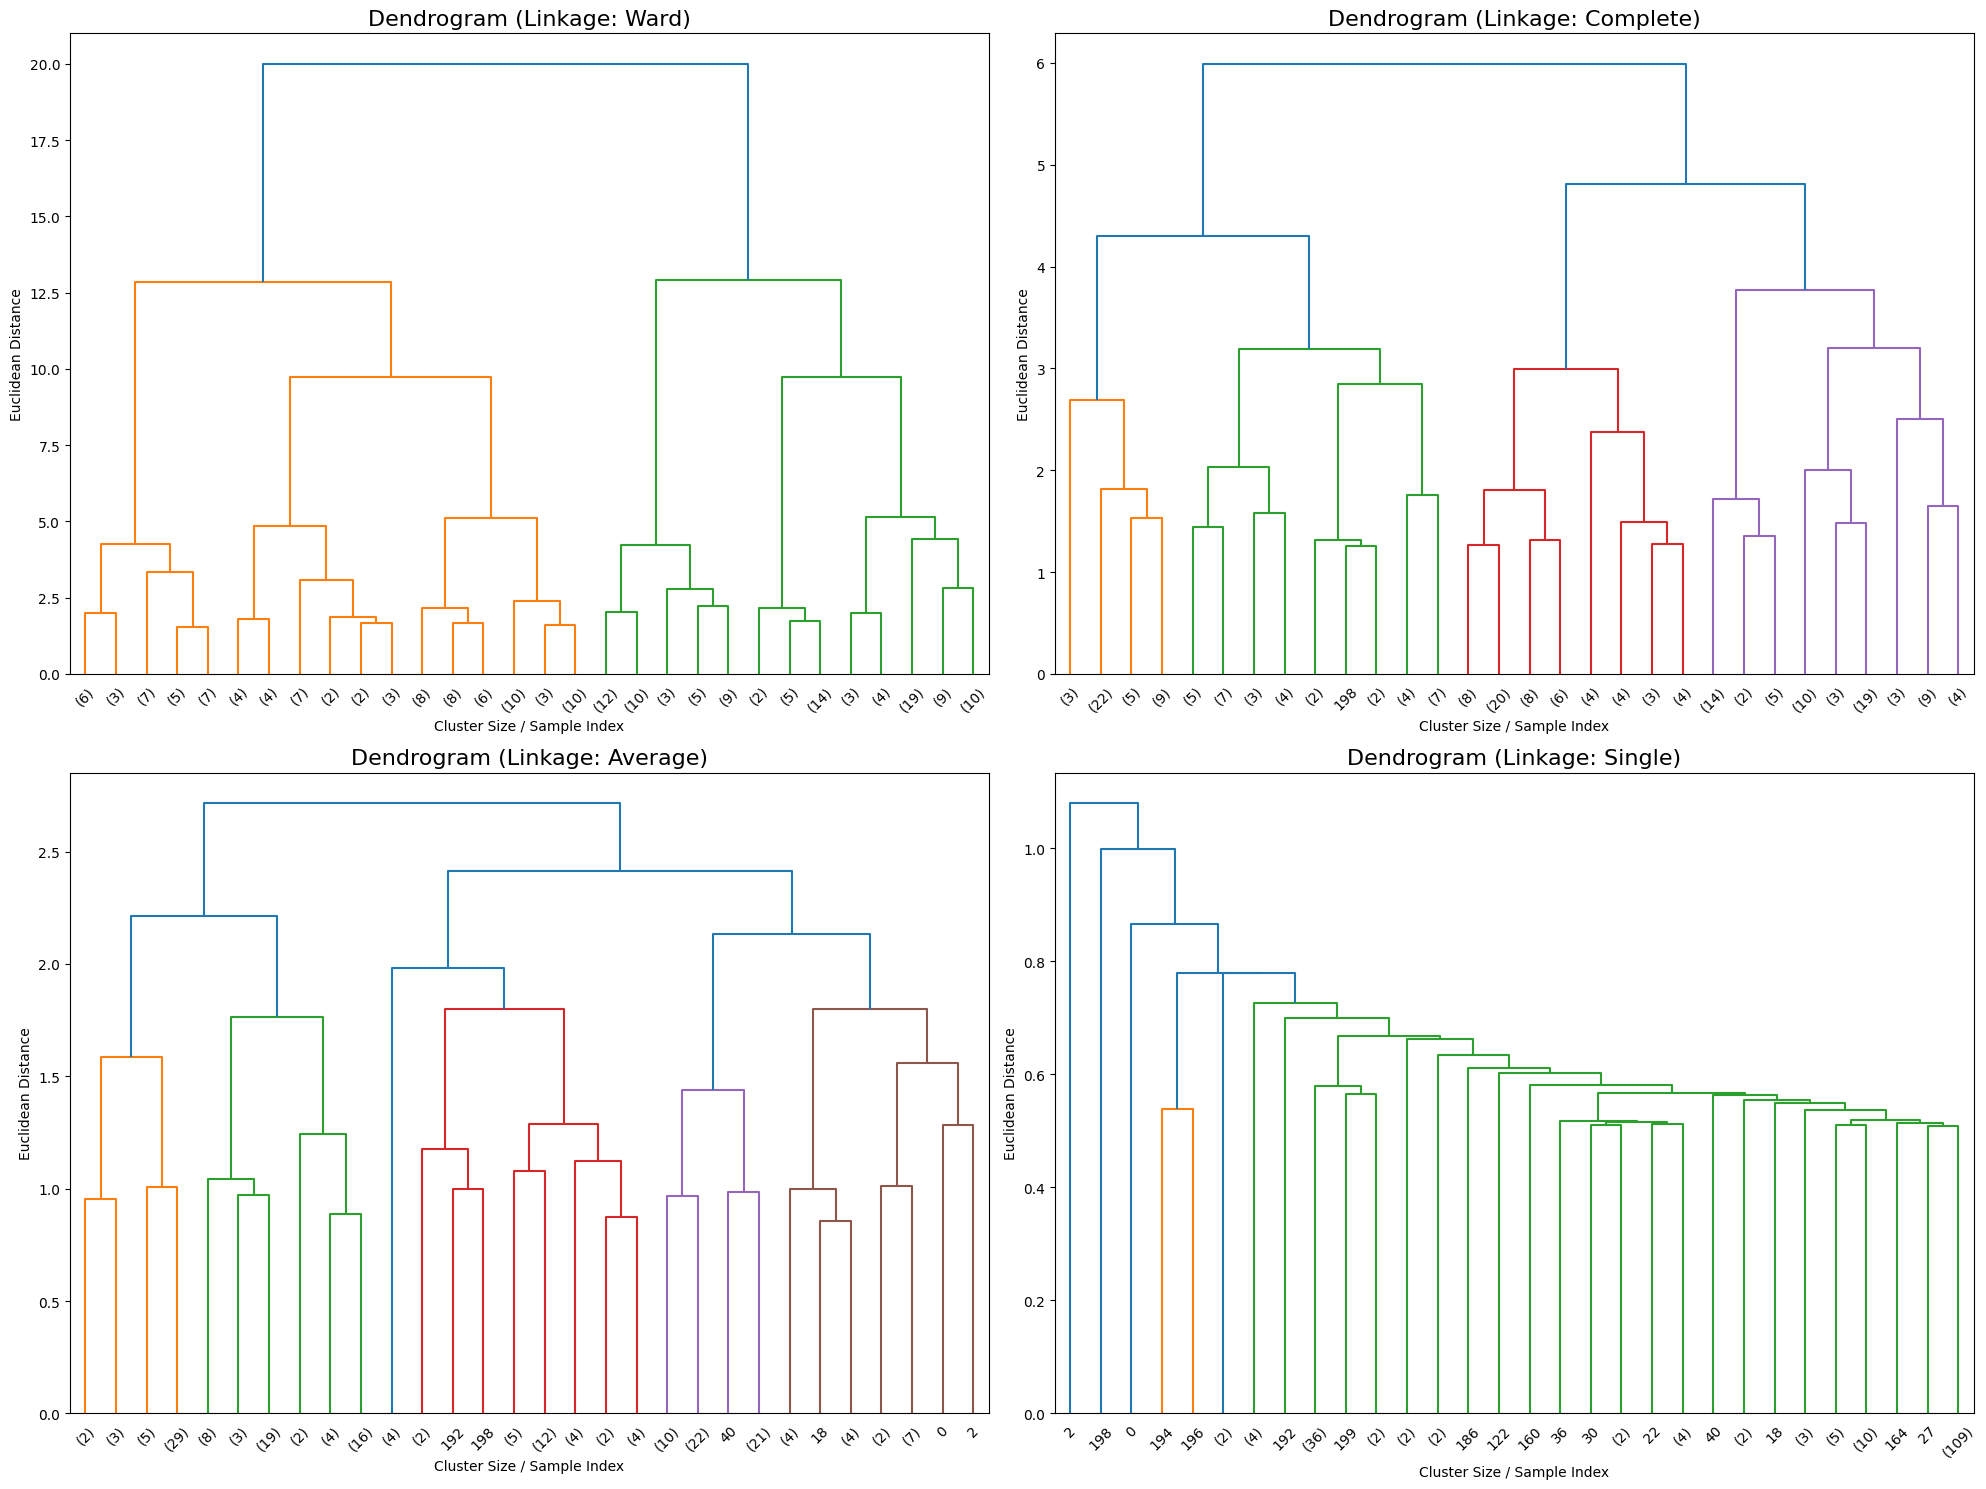

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage as hierarchy_linkage
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

for i, l in enumerate(linkages):
    
    Z = hierarchy_linkage(scaled_numerical_data, method=l)
    
    
    dendrogram(Z, ax=axes[i], truncate_mode='lastp', p=30)
    
    axes[i].set_title(f'Dendrogram (Linkage: {l.capitalize()})', fontsize=16)
    axes[i].set_xlabel('Cluster Size / Sample Index')
    axes[i].set_ylabel('Euclidean Distance')

plt.tight_layout()
plt.show()

## DBscan

In [44]:
from sklearn.cluster import DBSCAN
eps_values = [0.1, 0.2, 0.4, 0.6, 0.8]
min_samples_values = [3, 5, 10]
results = []


In [45]:
for epsilon in eps_values:
    for min_sample in min_samples_values:
        db = DBSCAN(eps = epsilon, min_samples= min_sample)
        labels = db.fit_predict(scaled_numerical_data)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_rate = list(labels).count(-1) / len(labels)
        scores = np.nan
        if n_clusters > 1:
            score = silhouette_score(scaled_numerical_data[labels!= -1], labels[labels!= -1])
        
        results.append({'eps': epsilon, 'min_samples': min_sample, 'clusters': n_clusters, 'noise': noise_rate, 'silhouette': score})

In [46]:
results_df = pd.DataFrame(results)
print(results_df)

    eps  min_samples  clusters  noise  silhouette
0   0.1            3         0  1.000    0.374561
1   0.1            5         0  1.000    0.374561
2   0.1           10         0  1.000    0.374561
3   0.2            3        11  0.805    0.645880
4   0.2            5         1  0.975    0.645880
5   0.2           10         0  1.000    0.645880
6   0.4            3        10  0.295    0.442575
7   0.4            5         6  0.490    0.519023
8   0.4           10         2  0.850    0.766073
9   0.6            3         3  0.070    0.214881
10  0.6            5         2  0.140    0.273047
11  0.6           10         4  0.330    0.529589
12  0.8            3         1  0.015    0.529589
13  0.8            5         1  0.030    0.529589
14  0.8           10         1  0.115    0.529589


the number of clusters should >= 2
noise rate should not be very high
Silhouette score should be high for datas in cluster; the more this is, the more separated clusters are


11th record: 
eps = 0.6 , min_samples= 10, clusters = 4, nois rate = 0.33 , score = 0.52

this is best result 

## Comparison

In [47]:
df_scaled_numerical_data_pca['KMeans'] = KMeans(n_clusters=6, random_state=42).fit_predict(scaled_numerical_data)

In [48]:
df_scaled_numerical_data_pca['Agg'] = AgglomerativeClustering(n_clusters=6, linkage='ward').fit_predict(scaled_numerical_data)

In [49]:
df_scaled_numerical_data_pca['DBSCAN'] = DBSCAN(eps=0.6, min_samples=10).fit_predict(scaled_numerical_data)

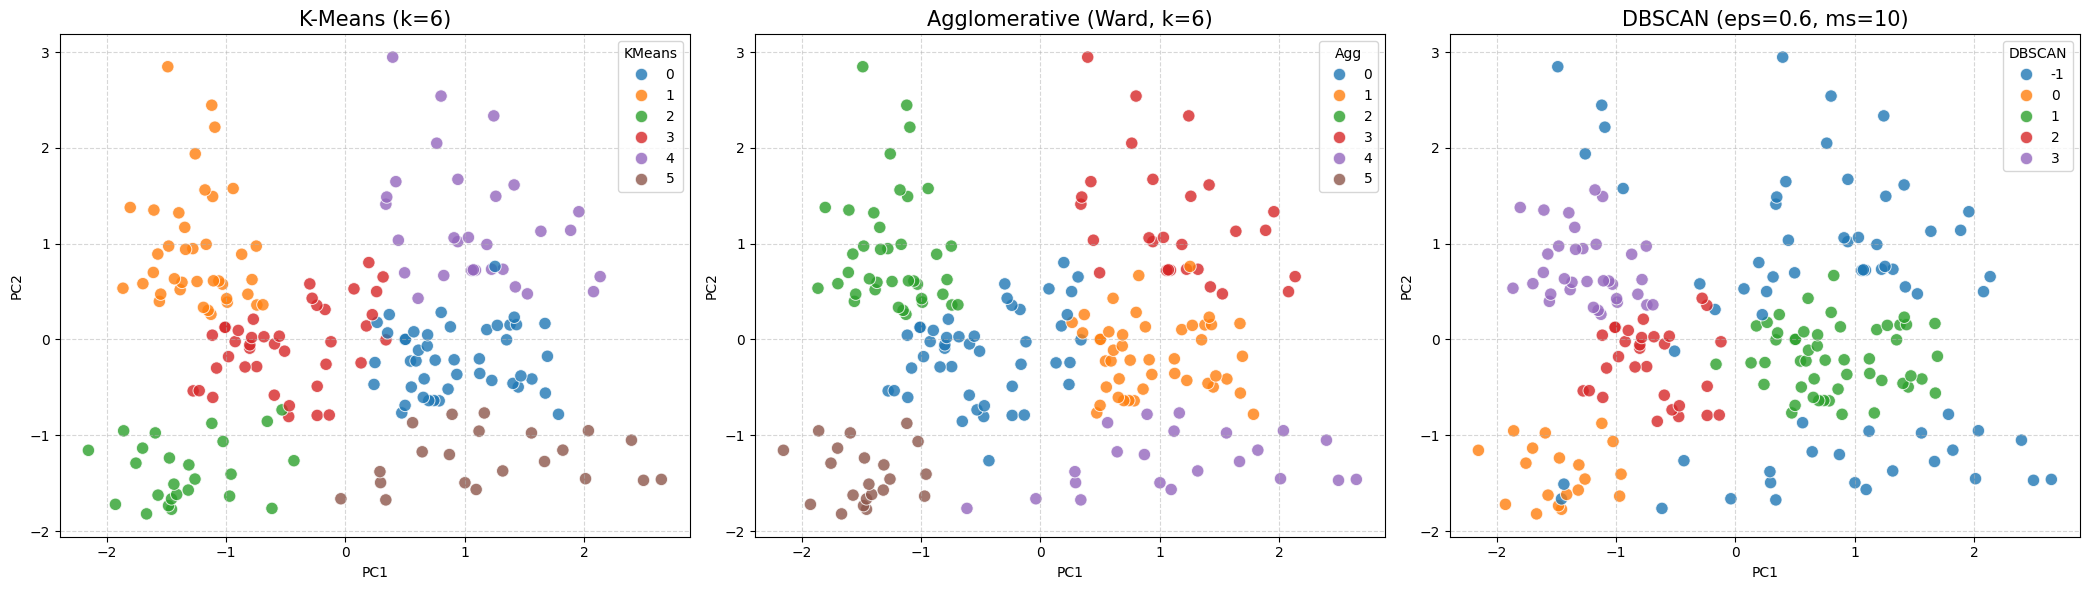

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

titles = ['K-Means (k=6)', 'Agglomerative (Ward, k=6)', 'DBSCAN (eps=0.6, ms=10)']
columns = ['KMeans', 'Agg', 'DBSCAN']

for i in range(3):
    sns.scatterplot(x='PC1', y='PC2', hue=columns[i], data=df_scaled_numerical_data_pca, 
                    palette='tab10', ax=axes[i], s=80, alpha=0.8)
    axes[i].set_title(titles[i], fontsize=15)
    axes[i].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()